In [25]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
import matplotlib.pyplot as plt
from PIL import Image
# from google.colab import files

In [7]:
SIZE = 224

In [11]:
train, _ = tfds.load('cats_vs_dogs', split=['train[:100%]'], with_info=True, as_supervised=True)

tf.Tensor(0, shape=(), dtype=int64)


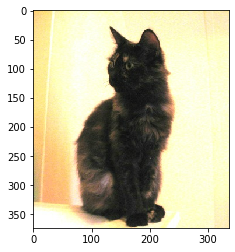

In [16]:
for img, label in train[0].take(1):
    plt.figure()
    plt.imshow(img)
    print(label)

In [17]:
def resize_image(img, label):
    img = tf.cast(img, tf.float32)
    img = tf.image.resize(img, (SIZE, SIZE))
    img = img/255.0
    return img, label

In [18]:
train_resized = train[0].map(resize_image)
train_batches = train_resized.shuffle(1000).batch(16)

In [21]:
base_layers = tf.keras.applications.MobileNetV2(input_shape=(SIZE, SIZE, 3), include_top=False)
base_layers.trainable = False

9412608/9406464 [==============================] - ETA: 12 - ETA: 15 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 13 - ETA: 13 - ETA: 14 - ETA: 13 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA

In [22]:
model = tf.keras.Sequential([
    base_layers,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(1),
])

model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
model.fit(train_batches, epochs=5)

Epoch 1/5


 178/1454 [==>...........................] - ETA: 0s - loss: 0.7462 - accuracy: 0.62 - ETA: 6:54 - loss: 0.7359 - accuracy: 0.59 - ETA: 8:50 - loss: 0.6767 - accuracy: 0.62 - ETA: 9:34 - loss: 0.6176 - accuracy: 0.67 - ETA: 10:13 - loss: 0.5857 - accuracy: 0.675 - ETA: 10:37 - loss: 0.5836 - accuracy: 0.656 - ETA: 10:56 - loss: 0.5720 - accuracy: 0.642 - ETA: 11:07 - loss: 0.5506 - accuracy: 0.671 - ETA: 11:19 - loss: 0.5292 - accuracy: 0.680 - ETA: 11:25 - loss: 0.5134 - accuracy: 0.693 - ETA: 11:32 - loss: 0.4959 - accuracy: 0.704 - ETA: 11:37 - loss: 0.4940 - accuracy: 0.708 - ETA: 11:39 - loss: 0.4856 - accuracy: 0.706 - ETA: 11:45 - loss: 0.4698 - accuracy: 0.723 - ETA: 11:47 - loss: 0.4588 - accuracy: 0.733 - ETA: 11:51 - loss: 0.4514 - accuracy: 0.746 - ETA: 11:49 - loss: 0.4500 - accuracy: 0.750 - ETA: 11:47 - loss: 0.4378 - accuracy: 0.760 - ETA: 11:45 - loss: 0.4312 - accuracy: 0.763 - ETA: 11:43 - loss: 0.4218 - accuracy: 0.775 - ETA: 11:42 - loss: 0.4105 - accuracy: 0.782 -

 358/1454 [======>.......................] - ETA: 11:01 - loss: 0.1402 - accuracy: 0.942 - ETA: 11:01 - loss: 0.1396 - accuracy: 0.942 - ETA: 11:01 - loss: 0.1389 - accuracy: 0.943 - ETA: 11:00 - loss: 0.1385 - accuracy: 0.943 - ETA: 10:59 - loss: 0.1381 - accuracy: 0.943 - ETA: 10:59 - loss: 0.1375 - accuracy: 0.943 - ETA: 10:59 - loss: 0.1369 - accuracy: 0.943 - ETA: 10:58 - loss: 0.1366 - accuracy: 0.944 - ETA: 10:58 - loss: 0.1365 - accuracy: 0.944 - ETA: 10:57 - loss: 0.1377 - accuracy: 0.944 - ETA: 10:57 - loss: 0.1371 - accuracy: 0.944 - ETA: 10:56 - loss: 0.1365 - accuracy: 0.945 - ETA: 10:55 - loss: 0.1359 - accuracy: 0.945 - ETA: 10:55 - loss: 0.1353 - accuracy: 0.945 - ETA: 10:54 - loss: 0.1349 - accuracy: 0.945 - ETA: 10:54 - loss: 0.1342 - accuracy: 0.946 - ETA: 10:54 - loss: 0.1338 - accuracy: 0.946 - ETA: 10:53 - loss: 0.1340 - accuracy: 0.946 - ETA: 10:53 - loss: 0.1335 - accuracy: 0.946 - ETA: 10:52 - loss: 0.1330 - accuracy: 0.947 - ETA: 10:51 - loss: 0.1334 - accurac

 544/1454 [==========>...................] - ETA: 9:34 - loss: 0.1021 - accuracy: 0.95 - ETA: 9:34 - loss: 0.1019 - accuracy: 0.95 - ETA: 9:33 - loss: 0.1017 - accuracy: 0.95 - ETA: 9:33 - loss: 0.1019 - accuracy: 0.95 - ETA: 9:32 - loss: 0.1016 - accuracy: 0.95 - ETA: 9:32 - loss: 0.1014 - accuracy: 0.95 - ETA: 9:31 - loss: 0.1011 - accuracy: 0.95 - ETA: 9:31 - loss: 0.1012 - accuracy: 0.95 - ETA: 9:30 - loss: 0.1009 - accuracy: 0.96 - ETA: 9:30 - loss: 0.1007 - accuracy: 0.96 - ETA: 9:29 - loss: 0.1012 - accuracy: 0.95 - ETA: 9:29 - loss: 0.1009 - accuracy: 0.96 - ETA: 9:28 - loss: 0.1009 - accuracy: 0.95 - ETA: 9:28 - loss: 0.1007 - accuracy: 0.96 - ETA: 9:27 - loss: 0.1007 - accuracy: 0.95 - ETA: 9:27 - loss: 0.1005 - accuracy: 0.95 - ETA: 9:26 - loss: 0.1003 - accuracy: 0.96 - ETA: 9:26 - loss: 0.1001 - accuracy: 0.96 - ETA: 9:25 - loss: 0.0999 - accuracy: 0.96 - ETA: 9:25 - loss: 0.0997 - accuracy: 0.96 - ETA: 9:24 - loss: 0.0995 - accuracy: 0.96 - ETA: 9:23 - loss: 0.0993 - accu

 730/1454 [==============>...............] - ETA: 7:58 - loss: 0.0874 - accuracy: 0.96 - ETA: 7:57 - loss: 0.0873 - accuracy: 0.96 - ETA: 7:57 - loss: 0.0873 - accuracy: 0.96 - ETA: 7:56 - loss: 0.0872 - accuracy: 0.96 - ETA: 7:56 - loss: 0.0871 - accuracy: 0.96 - ETA: 7:55 - loss: 0.0870 - accuracy: 0.96 - ETA: 7:55 - loss: 0.0874 - accuracy: 0.96 - ETA: 7:54 - loss: 0.0873 - accuracy: 0.96 - ETA: 7:53 - loss: 0.0875 - accuracy: 0.96 - ETA: 7:53 - loss: 0.0880 - accuracy: 0.96 - ETA: 7:52 - loss: 0.0878 - accuracy: 0.96 - ETA: 7:52 - loss: 0.0880 - accuracy: 0.96 - ETA: 7:51 - loss: 0.0882 - accuracy: 0.96 - ETA: 7:51 - loss: 0.0883 - accuracy: 0.96 - ETA: 7:50 - loss: 0.0882 - accuracy: 0.96 - ETA: 7:50 - loss: 0.0884 - accuracy: 0.96 - ETA: 7:49 - loss: 0.0883 - accuracy: 0.96 - ETA: 7:49 - loss: 0.0881 - accuracy: 0.96 - ETA: 7:48 - loss: 0.0880 - accuracy: 0.96 - ETA: 7:48 - loss: 0.0879 - accuracy: 0.96 - ETA: 7:47 - loss: 0.0878 - accuracy: 0.96 - ETA: 7:47 - loss: 0.0877 - accu

 916/1454 [=================>............] - ETA: 6:21 - loss: 0.0782 - accuracy: 0.97 - ETA: 6:20 - loss: 0.0781 - accuracy: 0.97 - ETA: 6:20 - loss: 0.0781 - accuracy: 0.97 - ETA: 6:19 - loss: 0.0782 - accuracy: 0.97 - ETA: 6:19 - loss: 0.0781 - accuracy: 0.97 - ETA: 6:18 - loss: 0.0780 - accuracy: 0.97 - ETA: 6:18 - loss: 0.0779 - accuracy: 0.97 - ETA: 6:17 - loss: 0.0779 - accuracy: 0.97 - ETA: 6:17 - loss: 0.0778 - accuracy: 0.97 - ETA: 6:16 - loss: 0.0777 - accuracy: 0.97 - ETA: 6:16 - loss: 0.0777 - accuracy: 0.97 - ETA: 6:15 - loss: 0.0776 - accuracy: 0.97 - ETA: 6:15 - loss: 0.0778 - accuracy: 0.97 - ETA: 6:14 - loss: 0.0777 - accuracy: 0.97 - ETA: 6:14 - loss: 0.0776 - accuracy: 0.97 - ETA: 6:13 - loss: 0.0775 - accuracy: 0.97 - ETA: 6:13 - loss: 0.0778 - accuracy: 0.97 - ETA: 6:12 - loss: 0.0777 - accuracy: 0.97 - ETA: 6:12 - loss: 0.0776 - accuracy: 0.97 - ETA: 6:11 - loss: 0.0775 - accuracy: 0.97 - ETA: 6:10 - loss: 0.0774 - accuracy: 0.97 - ETA: 6:10 - loss: 0.0773 - accu

1102/1454 [=====================>........] - ETA: 4:43 - loss: 0.0752 - accuracy: 0.97 - ETA: 4:43 - loss: 0.0751 - accuracy: 0.97 - ETA: 4:42 - loss: 0.0750 - accuracy: 0.97 - ETA: 4:41 - loss: 0.0750 - accuracy: 0.97 - ETA: 4:41 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:40 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:40 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:39 - loss: 0.0747 - accuracy: 0.97 - ETA: 4:39 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:38 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:38 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:37 - loss: 0.0747 - accuracy: 0.97 - ETA: 4:37 - loss: 0.0747 - accuracy: 0.97 - ETA: 4:36 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:36 - loss: 0.0749 - accuracy: 0.97 - ETA: 4:35 - loss: 0.0748 - accuracy: 0.97 - ETA: 4:35 - loss: 0.0747 - accuracy: 0.97 - ETA: 4:34 - loss: 0.0747 - accuracy: 0.97 - ETA: 4:34 - loss: 0.0747 - accuracy: 0.97 - ETA: 4:33 - loss: 0.0747 - accuracy: 0.97 - ETA: 4:33 - loss: 0.0747 - accuracy: 0.97 - ETA: 4:32 - loss: 0.0746 - accu

1288/1454 [=========================>....] - ETA: 3:05 - loss: 0.0712 - accuracy: 0.97 - ETA: 3:05 - loss: 0.0711 - accuracy: 0.97 - ETA: 3:04 - loss: 0.0711 - accuracy: 0.97 - ETA: 3:04 - loss: 0.0711 - accuracy: 0.97 - ETA: 3:03 - loss: 0.0711 - accuracy: 0.97 - ETA: 3:03 - loss: 0.0710 - accuracy: 0.97 - ETA: 3:02 - loss: 0.0710 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0709 - accuracy: 0.97 - ETA: 3:01 - loss: 0.0711 - accuracy: 0.97 - ETA: 3:00 - loss: 0.0711 - accuracy: 0.97 - ETA: 3:00 - loss: 0.0710 - accuracy: 0.97 - ETA: 2:59 - loss: 0.0710 - accuracy: 0.97 - ETA: 2:59 - loss: 0.0710 - accuracy: 0.97 - ETA: 2:58 - loss: 0.0709 - accuracy: 0.97 - ETA: 2:58 - loss: 0.0709 - accuracy: 0.97 - ETA: 2:57 - loss: 0.0708 - accuracy: 0.97 - ETA: 2:57 - loss: 0.0708 - accuracy: 0.97 - ETA: 2:56 - loss: 0.0708 - accuracy: 0.97 - ETA: 2:56 - loss: 0.0709 - accuracy: 0.97 - ETA: 2:55 - loss: 0.0710 - accuracy: 0.97 - ETA: 2:55 - loss: 0.0711 - accuracy: 0.97 - ETA: 2:54 - loss: 0.0710 - accu

1454/1454 [==============================] - ETA: 1:27 - loss: 0.0664 - accuracy: 0.97 - ETA: 1:26 - loss: 0.0664 - accuracy: 0.97 - ETA: 1:26 - loss: 0.0664 - accuracy: 0.97 - ETA: 1:25 - loss: 0.0664 - accuracy: 0.97 - ETA: 1:25 - loss: 0.0663 - accuracy: 0.97 - ETA: 1:24 - loss: 0.0663 - accuracy: 0.97 - ETA: 1:24 - loss: 0.0663 - accuracy: 0.97 - ETA: 1:23 - loss: 0.0663 - accuracy: 0.97 - ETA: 1:23 - loss: 0.0662 - accuracy: 0.97 - ETA: 1:22 - loss: 0.0662 - accuracy: 0.97 - ETA: 1:22 - loss: 0.0662 - accuracy: 0.97 - ETA: 1:21 - loss: 0.0661 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0661 - accuracy: 0.97 - ETA: 1:20 - loss: 0.0661 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0660 - accuracy: 0.97 - ETA: 1:19 - loss: 0.0660 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0659 - accuracy: 0.97 - ETA: 1:18 - loss: 0.0662 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0662 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0661 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0661 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0661 - accu

 178/1454 [==>...........................] - ETA: 0s - loss: 0.0209 - accuracy: 1.00 - ETA: 6:25 - loss: 0.0971 - accuracy: 0.96 - ETA: 8:31 - loss: 0.0726 - accuracy: 0.97 - ETA: 9:37 - loss: 0.1236 - accuracy: 0.95 - ETA: 10:11 - loss: 0.1019 - accuracy: 0.962 - ETA: 10:37 - loss: 0.0888 - accuracy: 0.968 - ETA: 10:56 - loss: 0.0781 - accuracy: 0.973 - ETA: 11:11 - loss: 0.0827 - accuracy: 0.968 - ETA: 11:21 - loss: 0.0739 - accuracy: 0.972 - ETA: 11:29 - loss: 0.0794 - accuracy: 0.968 - ETA: 11:37 - loss: 0.0725 - accuracy: 0.971 - ETA: 11:41 - loss: 0.0668 - accuracy: 0.974 - ETA: 11:46 - loss: 0.0629 - accuracy: 0.976 - ETA: 11:49 - loss: 0.0588 - accuracy: 0.977 - ETA: 11:52 - loss: 0.0550 - accuracy: 0.979 - ETA: 11:48 - loss: 0.0717 - accuracy: 0.972 - ETA: 11:51 - loss: 0.0678 - accuracy: 0.974 - ETA: 11:54 - loss: 0.0644 - accuracy: 0.975 - ETA: 11:56 - loss: 0.0654 - accuracy: 0.977 - ETA: 11:58 - loss: 0.0622 - accuracy: 0.978 - ETA: 11:59 - loss: 0.0595 - accuracy: 0.979 -

 357/1454 [======>.......................] - ETA: 11:13 - loss: 0.0438 - accuracy: 0.983 - ETA: 11:12 - loss: 0.0436 - accuracy: 0.983 - ETA: 11:12 - loss: 0.0439 - accuracy: 0.983 - ETA: 11:11 - loss: 0.0437 - accuracy: 0.983 - ETA: 11:11 - loss: 0.0441 - accuracy: 0.983 - ETA: 11:10 - loss: 0.0442 - accuracy: 0.983 - ETA: 11:10 - loss: 0.0440 - accuracy: 0.983 - ETA: 11:09 - loss: 0.0438 - accuracy: 0.983 - ETA: 11:08 - loss: 0.0441 - accuracy: 0.983 - ETA: 11:08 - loss: 0.0439 - accuracy: 0.983 - ETA: 11:07 - loss: 0.0438 - accuracy: 0.983 - ETA: 11:07 - loss: 0.0438 - accuracy: 0.983 - ETA: 11:06 - loss: 0.0436 - accuracy: 0.984 - ETA: 11:06 - loss: 0.0437 - accuracy: 0.984 - ETA: 11:05 - loss: 0.0440 - accuracy: 0.983 - ETA: 11:05 - loss: 0.0447 - accuracy: 0.983 - ETA: 11:04 - loss: 0.0445 - accuracy: 0.983 - ETA: 11:04 - loss: 0.0444 - accuracy: 0.983 - ETA: 11:03 - loss: 0.0442 - accuracy: 0.983 - ETA: 11:03 - loss: 0.0452 - accuracy: 0.983 - ETA: 11:02 - loss: 0.0450 - accurac

 543/1454 [==========>...................] - ETA: 9:39 - loss: 0.0466 - accuracy: 0.98 - ETA: 9:38 - loss: 0.0468 - accuracy: 0.98 - ETA: 9:38 - loss: 0.0468 - accuracy: 0.98 - ETA: 9:37 - loss: 0.0467 - accuracy: 0.98 - ETA: 9:37 - loss: 0.0477 - accuracy: 0.98 - ETA: 9:37 - loss: 0.0478 - accuracy: 0.98 - ETA: 9:36 - loss: 0.0477 - accuracy: 0.98 - ETA: 9:36 - loss: 0.0477 - accuracy: 0.98 - ETA: 9:35 - loss: 0.0477 - accuracy: 0.98 - ETA: 9:35 - loss: 0.0482 - accuracy: 0.98 - ETA: 9:34 - loss: 0.0480 - accuracy: 0.98 - ETA: 9:34 - loss: 0.0482 - accuracy: 0.98 - ETA: 9:33 - loss: 0.0482 - accuracy: 0.98 - ETA: 9:33 - loss: 0.0481 - accuracy: 0.98 - ETA: 9:32 - loss: 0.0480 - accuracy: 0.98 - ETA: 9:32 - loss: 0.0486 - accuracy: 0.98 - ETA: 9:31 - loss: 0.0486 - accuracy: 0.98 - ETA: 9:31 - loss: 0.0485 - accuracy: 0.98 - ETA: 9:30 - loss: 0.0491 - accuracy: 0.98 - ETA: 9:30 - loss: 0.0490 - accuracy: 0.98 - ETA: 9:29 - loss: 0.0489 - accuracy: 0.98 - ETA: 9:29 - loss: 0.0491 - accu

 729/1454 [==============>...............] - ETA: 8:01 - loss: 0.0461 - accuracy: 0.98 - ETA: 8:01 - loss: 0.0463 - accuracy: 0.98 - ETA: 8:00 - loss: 0.0463 - accuracy: 0.98 - ETA: 8:00 - loss: 0.0462 - accuracy: 0.98 - ETA: 7:59 - loss: 0.0461 - accuracy: 0.98 - ETA: 7:59 - loss: 0.0461 - accuracy: 0.98 - ETA: 7:58 - loss: 0.0460 - accuracy: 0.98 - ETA: 7:58 - loss: 0.0460 - accuracy: 0.98 - ETA: 7:57 - loss: 0.0463 - accuracy: 0.98 - ETA: 7:57 - loss: 0.0462 - accuracy: 0.98 - ETA: 7:56 - loss: 0.0462 - accuracy: 0.98 - ETA: 7:55 - loss: 0.0465 - accuracy: 0.98 - ETA: 7:55 - loss: 0.0464 - accuracy: 0.98 - ETA: 7:54 - loss: 0.0463 - accuracy: 0.98 - ETA: 7:54 - loss: 0.0463 - accuracy: 0.98 - ETA: 7:53 - loss: 0.0462 - accuracy: 0.98 - ETA: 7:53 - loss: 0.0461 - accuracy: 0.98 - ETA: 7:52 - loss: 0.0460 - accuracy: 0.98 - ETA: 7:52 - loss: 0.0460 - accuracy: 0.98 - ETA: 7:51 - loss: 0.0459 - accuracy: 0.98 - ETA: 7:51 - loss: 0.0459 - accuracy: 0.98 - ETA: 7:50 - loss: 0.0458 - accu

 915/1454 [=================>............] - ETA: 6:23 - loss: 0.0451 - accuracy: 0.98 - ETA: 6:22 - loss: 0.0451 - accuracy: 0.98 - ETA: 6:22 - loss: 0.0451 - accuracy: 0.98 - ETA: 6:21 - loss: 0.0450 - accuracy: 0.98 - ETA: 6:21 - loss: 0.0450 - accuracy: 0.98 - ETA: 6:20 - loss: 0.0449 - accuracy: 0.98 - ETA: 6:20 - loss: 0.0449 - accuracy: 0.98 - ETA: 6:20 - loss: 0.0448 - accuracy: 0.98 - ETA: 6:19 - loss: 0.0448 - accuracy: 0.98 - ETA: 6:18 - loss: 0.0447 - accuracy: 0.98 - ETA: 6:18 - loss: 0.0447 - accuracy: 0.98 - ETA: 6:17 - loss: 0.0447 - accuracy: 0.98 - ETA: 6:17 - loss: 0.0446 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0446 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0445 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0445 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0445 - accuracy: 0.98 - ETA: 6:14 - loss: 0.0444 - accuracy: 0.98 - ETA: 6:14 - loss: 0.0444 - accuracy: 0.98 - ETA: 6:13 - loss: 0.0443 - accuracy: 0.98 - ETA: 6:13 - loss: 0.0443 - accuracy: 0.98 - ETA: 6:12 - loss: 0.0442 - accu

1101/1454 [=====================>........] - ETA: 4:45 - loss: 0.0463 - accuracy: 0.98 - ETA: 4:44 - loss: 0.0463 - accuracy: 0.98 - ETA: 4:44 - loss: 0.0462 - accuracy: 0.98 - ETA: 4:43 - loss: 0.0462 - accuracy: 0.98 - ETA: 4:43 - loss: 0.0461 - accuracy: 0.98 - ETA: 4:42 - loss: 0.0461 - accuracy: 0.98 - ETA: 4:41 - loss: 0.0464 - accuracy: 0.98 - ETA: 4:41 - loss: 0.0463 - accuracy: 0.98 - ETA: 4:40 - loss: 0.0463 - accuracy: 0.98 - ETA: 4:40 - loss: 0.0463 - accuracy: 0.98 - ETA: 4:39 - loss: 0.0462 - accuracy: 0.98 - ETA: 4:39 - loss: 0.0462 - accuracy: 0.98 - ETA: 4:38 - loss: 0.0462 - accuracy: 0.98 - ETA: 4:38 - loss: 0.0462 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0462 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0462 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0461 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0461 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0461 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0461 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0460 - accuracy: 0.98 - ETA: 4:33 - loss: 0.0460 - accu

1287/1454 [=========================>....] - ETA: 3:06 - loss: 0.0464 - accuracy: 0.98 - ETA: 3:06 - loss: 0.0464 - accuracy: 0.98 - ETA: 3:05 - loss: 0.0464 - accuracy: 0.98 - ETA: 3:05 - loss: 0.0463 - accuracy: 0.98 - ETA: 3:04 - loss: 0.0467 - accuracy: 0.98 - ETA: 3:04 - loss: 0.0466 - accuracy: 0.98 - ETA: 3:03 - loss: 0.0466 - accuracy: 0.98 - ETA: 3:02 - loss: 0.0466 - accuracy: 0.98 - ETA: 3:02 - loss: 0.0466 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0466 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0466 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0466 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0466 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0466 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0465 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0465 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0465 - accuracy: 0.98 - ETA: 2:57 - loss: 0.0464 - accuracy: 0.98 - ETA: 2:57 - loss: 0.0464 - accuracy: 0.98 - ETA: 2:56 - loss: 0.0464 - accuracy: 0.98 - ETA: 2:56 - loss: 0.0464 - accuracy: 0.98 - ETA: 2:55 - loss: 0.0464 - accu

1454/1454 [==============================] - ETA: 1:28 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:27 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0451 - accuracy: 0.98 - ETA: 1:26 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0451 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0451 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0451 - accuracy: 0.98 - ETA: 1:22 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:22 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:21 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:21 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:20 - loss: 0.0451 - accuracy: 0.98 - ETA: 1:20 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0450 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0450 - accu

 178/1454 [==>...........................] - ETA: 0s - loss: 0.0129 - accuracy: 1.00 - ETA: 6:44 - loss: 0.0072 - accuracy: 1.00 - ETA: 8:33 - loss: 0.0490 - accuracy: 0.97 - ETA: 9:30 - loss: 0.0428 - accuracy: 0.98 - ETA: 10:11 - loss: 0.0378 - accuracy: 0.987 - ETA: 10:39 - loss: 0.0318 - accuracy: 0.989 - ETA: 10:56 - loss: 0.0398 - accuracy: 0.982 - ETA: 11:09 - loss: 0.0544 - accuracy: 0.976 - ETA: 11:20 - loss: 0.0487 - accuracy: 0.979 - ETA: 11:29 - loss: 0.0441 - accuracy: 0.981 - ETA: 11:34 - loss: 0.0448 - accuracy: 0.977 - ETA: 11:39 - loss: 0.0412 - accuracy: 0.979 - ETA: 11:43 - loss: 0.0382 - accuracy: 0.980 - ETA: 11:49 - loss: 0.0366 - accuracy: 0.982 - ETA: 11:51 - loss: 0.0357 - accuracy: 0.983 - ETA: 11:53 - loss: 0.0377 - accuracy: 0.980 - ETA: 11:56 - loss: 0.0359 - accuracy: 0.981 - ETA: 12:00 - loss: 0.0340 - accuracy: 0.982 - ETA: 12:03 - loss: 0.0331 - accuracy: 0.983 - ETA: 12:07 - loss: 0.0318 - accuracy: 0.984 - ETA: 12:10 - loss: 0.0317 - accuracy: 0.985 -

 357/1454 [======>.......................] - ETA: 11:10 - loss: 0.0389 - accuracy: 0.986 - ETA: 11:10 - loss: 0.0388 - accuracy: 0.986 - ETA: 11:10 - loss: 0.0390 - accuracy: 0.986 - ETA: 11:09 - loss: 0.0391 - accuracy: 0.985 - ETA: 11:08 - loss: 0.0391 - accuracy: 0.986 - ETA: 11:08 - loss: 0.0391 - accuracy: 0.986 - ETA: 11:07 - loss: 0.0389 - accuracy: 0.986 - ETA: 11:07 - loss: 0.0389 - accuracy: 0.985 - ETA: 11:07 - loss: 0.0396 - accuracy: 0.985 - ETA: 11:06 - loss: 0.0394 - accuracy: 0.985 - ETA: 11:06 - loss: 0.0392 - accuracy: 0.985 - ETA: 11:05 - loss: 0.0390 - accuracy: 0.985 - ETA: 11:05 - loss: 0.0388 - accuracy: 0.985 - ETA: 11:04 - loss: 0.0387 - accuracy: 0.986 - ETA: 11:04 - loss: 0.0385 - accuracy: 0.986 - ETA: 11:03 - loss: 0.0383 - accuracy: 0.986 - ETA: 11:02 - loss: 0.0381 - accuracy: 0.986 - ETA: 11:02 - loss: 0.0379 - accuracy: 0.986 - ETA: 11:01 - loss: 0.0380 - accuracy: 0.986 - ETA: 11:01 - loss: 0.0379 - accuracy: 0.986 - ETA: 11:00 - loss: 0.0377 - accurac

 543/1454 [==========>...................] - ETA: 9:38 - loss: 0.0398 - accuracy: 0.98 - ETA: 9:37 - loss: 0.0397 - accuracy: 0.98 - ETA: 9:37 - loss: 0.0397 - accuracy: 0.98 - ETA: 9:36 - loss: 0.0399 - accuracy: 0.98 - ETA: 9:36 - loss: 0.0405 - accuracy: 0.98 - ETA: 9:35 - loss: 0.0404 - accuracy: 0.98 - ETA: 9:35 - loss: 0.0403 - accuracy: 0.98 - ETA: 9:34 - loss: 0.0407 - accuracy: 0.98 - ETA: 9:34 - loss: 0.0407 - accuracy: 0.98 - ETA: 9:33 - loss: 0.0406 - accuracy: 0.98 - ETA: 9:33 - loss: 0.0406 - accuracy: 0.98 - ETA: 9:32 - loss: 0.0405 - accuracy: 0.98 - ETA: 9:31 - loss: 0.0404 - accuracy: 0.98 - ETA: 9:31 - loss: 0.0403 - accuracy: 0.98 - ETA: 9:30 - loss: 0.0402 - accuracy: 0.98 - ETA: 9:30 - loss: 0.0401 - accuracy: 0.98 - ETA: 9:29 - loss: 0.0400 - accuracy: 0.98 - ETA: 9:29 - loss: 0.0401 - accuracy: 0.98 - ETA: 9:28 - loss: 0.0400 - accuracy: 0.98 - ETA: 9:28 - loss: 0.0400 - accuracy: 0.98 - ETA: 9:27 - loss: 0.0400 - accuracy: 0.98 - ETA: 9:27 - loss: 0.0399 - accu

 729/1454 [==============>...............] - ETA: 8:01 - loss: 0.0412 - accuracy: 0.98 - ETA: 8:01 - loss: 0.0411 - accuracy: 0.98 - ETA: 8:00 - loss: 0.0411 - accuracy: 0.98 - ETA: 8:00 - loss: 0.0413 - accuracy: 0.98 - ETA: 7:59 - loss: 0.0413 - accuracy: 0.98 - ETA: 7:58 - loss: 0.0412 - accuracy: 0.98 - ETA: 7:58 - loss: 0.0416 - accuracy: 0.98 - ETA: 7:57 - loss: 0.0415 - accuracy: 0.98 - ETA: 7:57 - loss: 0.0415 - accuracy: 0.98 - ETA: 7:56 - loss: 0.0415 - accuracy: 0.98 - ETA: 7:56 - loss: 0.0414 - accuracy: 0.98 - ETA: 7:55 - loss: 0.0414 - accuracy: 0.98 - ETA: 7:55 - loss: 0.0413 - accuracy: 0.98 - ETA: 7:54 - loss: 0.0413 - accuracy: 0.98 - ETA: 7:54 - loss: 0.0412 - accuracy: 0.98 - ETA: 7:53 - loss: 0.0412 - accuracy: 0.98 - ETA: 7:53 - loss: 0.0411 - accuracy: 0.98 - ETA: 7:52 - loss: 0.0412 - accuracy: 0.98 - ETA: 7:52 - loss: 0.0411 - accuracy: 0.98 - ETA: 7:51 - loss: 0.0410 - accuracy: 0.98 - ETA: 7:51 - loss: 0.0410 - accuracy: 0.98 - ETA: 7:50 - loss: 0.0413 - accu

 915/1454 [=================>............] - ETA: 6:23 - loss: 0.0393 - accuracy: 0.98 - ETA: 6:22 - loss: 0.0392 - accuracy: 0.98 - ETA: 6:22 - loss: 0.0392 - accuracy: 0.98 - ETA: 6:21 - loss: 0.0392 - accuracy: 0.98 - ETA: 6:21 - loss: 0.0394 - accuracy: 0.98 - ETA: 6:20 - loss: 0.0393 - accuracy: 0.98 - ETA: 6:20 - loss: 0.0394 - accuracy: 0.98 - ETA: 6:19 - loss: 0.0393 - accuracy: 0.98 - ETA: 6:19 - loss: 0.0393 - accuracy: 0.98 - ETA: 6:18 - loss: 0.0393 - accuracy: 0.98 - ETA: 6:18 - loss: 0.0392 - accuracy: 0.98 - ETA: 6:17 - loss: 0.0392 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0391 - accuracy: 0.98 - ETA: 6:16 - loss: 0.0392 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0392 - accuracy: 0.98 - ETA: 6:15 - loss: 0.0394 - accuracy: 0.98 - ETA: 6:14 - loss: 0.0395 - accuracy: 0.98 - ETA: 6:14 - loss: 0.0394 - accuracy: 0.98 - ETA: 6:13 - loss: 0.0394 - accuracy: 0.98 - ETA: 6:13 - loss: 0.0393 - accuracy: 0.98 - ETA: 6:12 - loss: 0.0393 - accuracy: 0.98 - ETA: 6:12 - loss: 0.0393 - accu

1101/1454 [=====================>........] - ETA: 4:44 - loss: 0.0405 - accuracy: 0.98 - ETA: 4:43 - loss: 0.0404 - accuracy: 0.98 - ETA: 4:42 - loss: 0.0404 - accuracy: 0.98 - ETA: 4:42 - loss: 0.0404 - accuracy: 0.98 - ETA: 4:41 - loss: 0.0404 - accuracy: 0.98 - ETA: 4:41 - loss: 0.0403 - accuracy: 0.98 - ETA: 4:40 - loss: 0.0403 - accuracy: 0.98 - ETA: 4:40 - loss: 0.0402 - accuracy: 0.98 - ETA: 4:39 - loss: 0.0402 - accuracy: 0.98 - ETA: 4:39 - loss: 0.0402 - accuracy: 0.98 - ETA: 4:38 - loss: 0.0405 - accuracy: 0.98 - ETA: 4:38 - loss: 0.0408 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0407 - accuracy: 0.98 - ETA: 4:37 - loss: 0.0408 - accuracy: 0.98 - ETA: 4:36 - loss: 0.0407 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0407 - accuracy: 0.98 - ETA: 4:35 - loss: 0.0407 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0406 - accuracy: 0.98 - ETA: 4:34 - loss: 0.0406 - accuracy: 0.98 - ETA: 4:33 - loss: 0.0405 - accuracy: 0.98 - ETA: 4:33 - loss: 0.0405 - accuracy: 0.98 - ETA: 4:32 - loss: 0.0406 - accu

1287/1454 [=========================>....] - ETA: 3:02 - loss: 0.0421 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0421 - accuracy: 0.98 - ETA: 3:01 - loss: 0.0421 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0420 - accuracy: 0.98 - ETA: 3:00 - loss: 0.0420 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0420 - accuracy: 0.98 - ETA: 2:59 - loss: 0.0419 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0419 - accuracy: 0.98 - ETA: 2:58 - loss: 0.0419 - accuracy: 0.98 - ETA: 2:57 - loss: 0.0418 - accuracy: 0.98 - ETA: 2:57 - loss: 0.0418 - accuracy: 0.98 - ETA: 2:56 - loss: 0.0418 - accuracy: 0.98 - ETA: 2:55 - loss: 0.0417 - accuracy: 0.98 - ETA: 2:55 - loss: 0.0417 - accuracy: 0.98 - ETA: 2:54 - loss: 0.0417 - accuracy: 0.98 - ETA: 2:54 - loss: 0.0417 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0417 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0416 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0416 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0416 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0415 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0416 - accu

1454/1454 [==============================] - ETA: 1:26 - loss: 0.0409 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0409 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0409 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0409 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0409 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0409 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0412 - accuracy: 0.98 - ETA: 1:22 - loss: 0.0412 - accuracy: 0.98 - ETA: 1:21 - loss: 0.0412 - accuracy: 0.98 - ETA: 1:21 - loss: 0.0412 - accuracy: 0.98 - ETA: 1:20 - loss: 0.0412 - accuracy: 0.98 - ETA: 1:20 - loss: 0.0412 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0412 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0412 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0411 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0411 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0411 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0411 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0410 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0411 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0411 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0410 - accu

 178/1454 [==>...........................] - ETA: 0s - loss: 5.0982e-04 - accuracy: 1.00 - ETA: 5:41 - loss: 0.0391 - accuracy: 1.0000 - ETA: 8:10 - loss: 0.0322 - accuracy: 1.00 - ETA: 9:25 - loss: 0.0554 - accuracy: 0.98 - ETA: 10:08 - loss: 0.0445 - accuracy: 0.987 - ETA: 10:38 - loss: 0.0373 - accuracy: 0.989 - ETA: 10:51 - loss: 0.0321 - accuracy: 0.991 - ETA: 11:04 - loss: 0.0312 - accuracy: 0.992 - ETA: 11:07 - loss: 0.0279 - accuracy: 0.993 - ETA: 11:15 - loss: 0.0252 - accuracy: 0.993 - ETA: 11:17 - loss: 0.0234 - accuracy: 0.994 - ETA: 11:20 - loss: 0.0214 - accuracy: 0.994 - ETA: 11:24 - loss: 0.0214 - accuracy: 0.995 - ETA: 11:25 - loss: 0.0218 - accuracy: 0.995 - ETA: 11:27 - loss: 0.0215 - accuracy: 0.995 - ETA: 11:30 - loss: 0.0208 - accuracy: 0.996 - ETA: 11:32 - loss: 0.0197 - accuracy: 0.996 - ETA: 11:33 - loss: 0.0195 - accuracy: 0.996 - ETA: 11:33 - loss: 0.0189 - accuracy: 0.996 - ETA: 11:34 - loss: 0.0192 - accuracy: 0.996 - ETA: 11:34 - loss: 0.0217 - accuracy: 0

 360/1454 [======>.......................] - ETA: 10:40 - loss: 0.0368 - accuracy: 0.985 - ETA: 10:40 - loss: 0.0366 - accuracy: 0.985 - ETA: 10:40 - loss: 0.0364 - accuracy: 0.985 - ETA: 10:39 - loss: 0.0363 - accuracy: 0.985 - ETA: 10:39 - loss: 0.0361 - accuracy: 0.985 - ETA: 10:38 - loss: 0.0360 - accuracy: 0.985 - ETA: 10:37 - loss: 0.0372 - accuracy: 0.985 - ETA: 10:37 - loss: 0.0371 - accuracy: 0.985 - ETA: 10:36 - loss: 0.0369 - accuracy: 0.985 - ETA: 10:36 - loss: 0.0368 - accuracy: 0.985 - ETA: 10:35 - loss: 0.0366 - accuracy: 0.985 - ETA: 10:34 - loss: 0.0366 - accuracy: 0.985 - ETA: 10:34 - loss: 0.0364 - accuracy: 0.985 - ETA: 10:33 - loss: 0.0363 - accuracy: 0.985 - ETA: 10:33 - loss: 0.0361 - accuracy: 0.985 - ETA: 10:33 - loss: 0.0360 - accuracy: 0.985 - ETA: 10:32 - loss: 0.0358 - accuracy: 0.985 - ETA: 10:32 - loss: 0.0356 - accuracy: 0.986 - ETA: 10:32 - loss: 0.0356 - accuracy: 0.986 - ETA: 10:31 - loss: 0.0354 - accuracy: 0.986 - ETA: 10:31 - loss: 0.0353 - accurac

 546/1454 [==========>...................] - ETA: 9:04 - loss: 0.0421 - accuracy: 0.98 - ETA: 9:04 - loss: 0.0420 - accuracy: 0.98 - ETA: 9:03 - loss: 0.0419 - accuracy: 0.98 - ETA: 9:03 - loss: 0.0418 - accuracy: 0.98 - ETA: 9:03 - loss: 0.0417 - accuracy: 0.98 - ETA: 9:03 - loss: 0.0427 - accuracy: 0.98 - ETA: 9:02 - loss: 0.0425 - accuracy: 0.98 - ETA: 9:02 - loss: 0.0425 - accuracy: 0.98 - ETA: 9:02 - loss: 0.0426 - accuracy: 0.98 - ETA: 9:02 - loss: 0.0425 - accuracy: 0.98 - ETA: 9:02 - loss: 0.0424 - accuracy: 0.98 - ETA: 9:02 - loss: 0.0426 - accuracy: 0.98 - ETA: 9:02 - loss: 0.0432 - accuracy: 0.98 - ETA: 9:02 - loss: 0.0431 - accuracy: 0.98 - ETA: 9:01 - loss: 0.0430 - accuracy: 0.98 - ETA: 9:01 - loss: 0.0429 - accuracy: 0.98 - ETA: 9:01 - loss: 0.0428 - accuracy: 0.98 - ETA: 9:00 - loss: 0.0427 - accuracy: 0.98 - ETA: 8:59 - loss: 0.0426 - accuracy: 0.98 - ETA: 8:59 - loss: 0.0424 - accuracy: 0.98 - ETA: 8:58 - loss: 0.0423 - accuracy: 0.98 - ETA: 8:58 - loss: 0.0425 - accu

 732/1454 [==============>...............] - ETA: 7:35 - loss: 0.0414 - accuracy: 0.98 - ETA: 7:35 - loss: 0.0414 - accuracy: 0.98 - ETA: 7:34 - loss: 0.0413 - accuracy: 0.98 - ETA: 7:34 - loss: 0.0413 - accuracy: 0.98 - ETA: 7:33 - loss: 0.0412 - accuracy: 0.98 - ETA: 7:32 - loss: 0.0413 - accuracy: 0.98 - ETA: 7:32 - loss: 0.0413 - accuracy: 0.98 - ETA: 7:31 - loss: 0.0412 - accuracy: 0.98 - ETA: 7:31 - loss: 0.0411 - accuracy: 0.98 - ETA: 7:30 - loss: 0.0411 - accuracy: 0.98 - ETA: 7:30 - loss: 0.0410 - accuracy: 0.98 - ETA: 7:29 - loss: 0.0409 - accuracy: 0.98 - ETA: 7:29 - loss: 0.0409 - accuracy: 0.98 - ETA: 7:28 - loss: 0.0408 - accuracy: 0.98 - ETA: 7:28 - loss: 0.0410 - accuracy: 0.98 - ETA: 7:27 - loss: 0.0409 - accuracy: 0.98 - ETA: 7:27 - loss: 0.0409 - accuracy: 0.98 - ETA: 7:26 - loss: 0.0408 - accuracy: 0.98 - ETA: 7:26 - loss: 0.0408 - accuracy: 0.98 - ETA: 7:25 - loss: 0.0407 - accuracy: 0.98 - ETA: 7:25 - loss: 0.0407 - accuracy: 0.98 - ETA: 7:24 - loss: 0.0406 - accu

 918/1454 [=================>............] - ETA: 6:01 - loss: 0.0388 - accuracy: 0.98 - ETA: 6:00 - loss: 0.0390 - accuracy: 0.98 - ETA: 6:00 - loss: 0.0389 - accuracy: 0.98 - ETA: 5:59 - loss: 0.0389 - accuracy: 0.98 - ETA: 5:59 - loss: 0.0389 - accuracy: 0.98 - ETA: 5:58 - loss: 0.0388 - accuracy: 0.98 - ETA: 5:58 - loss: 0.0388 - accuracy: 0.98 - ETA: 5:57 - loss: 0.0388 - accuracy: 0.98 - ETA: 5:57 - loss: 0.0387 - accuracy: 0.98 - ETA: 5:56 - loss: 0.0387 - accuracy: 0.98 - ETA: 5:56 - loss: 0.0387 - accuracy: 0.98 - ETA: 5:55 - loss: 0.0386 - accuracy: 0.98 - ETA: 5:54 - loss: 0.0386 - accuracy: 0.98 - ETA: 5:54 - loss: 0.0385 - accuracy: 0.98 - ETA: 5:53 - loss: 0.0385 - accuracy: 0.98 - ETA: 5:52 - loss: 0.0385 - accuracy: 0.98 - ETA: 5:52 - loss: 0.0384 - accuracy: 0.98 - ETA: 5:51 - loss: 0.0384 - accuracy: 0.98 - ETA: 5:51 - loss: 0.0383 - accuracy: 0.98 - ETA: 5:50 - loss: 0.0383 - accuracy: 0.98 - ETA: 5:49 - loss: 0.0382 - accuracy: 0.98 - ETA: 5:49 - loss: 0.0382 - accu

1104/1454 [=====================>........] - ETA: 4:14 - loss: 0.0398 - accuracy: 0.98 - ETA: 4:13 - loss: 0.0397 - accuracy: 0.98 - ETA: 4:13 - loss: 0.0397 - accuracy: 0.98 - ETA: 4:12 - loss: 0.0396 - accuracy: 0.98 - ETA: 4:12 - loss: 0.0396 - accuracy: 0.98 - ETA: 4:11 - loss: 0.0396 - accuracy: 0.98 - ETA: 4:11 - loss: 0.0395 - accuracy: 0.98 - ETA: 4:10 - loss: 0.0396 - accuracy: 0.98 - ETA: 4:10 - loss: 0.0396 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0395 - accuracy: 0.98 - ETA: 4:09 - loss: 0.0395 - accuracy: 0.98 - ETA: 4:08 - loss: 0.0395 - accuracy: 0.98 - ETA: 4:08 - loss: 0.0395 - accuracy: 0.98 - ETA: 4:07 - loss: 0.0394 - accuracy: 0.98 - ETA: 4:07 - loss: 0.0394 - accuracy: 0.98 - ETA: 4:06 - loss: 0.0393 - accuracy: 0.98 - ETA: 4:06 - loss: 0.0393 - accuracy: 0.98 - ETA: 4:05 - loss: 0.0393 - accuracy: 0.98 - ETA: 4:04 - loss: 0.0392 - accuracy: 0.98 - ETA: 4:04 - loss: 0.0392 - accuracy: 0.98 - ETA: 4:03 - loss: 0.0392 - accuracy: 0.98 - ETA: 4:03 - loss: 0.0392 - accu

1290/1454 [=========================>....] - ETA: 2:39 - loss: 0.0406 - accuracy: 0.98 - ETA: 2:39 - loss: 0.0406 - accuracy: 0.98 - ETA: 2:38 - loss: 0.0405 - accuracy: 0.98 - ETA: 2:38 - loss: 0.0405 - accuracy: 0.98 - ETA: 2:37 - loss: 0.0405 - accuracy: 0.98 - ETA: 2:37 - loss: 0.0404 - accuracy: 0.98 - ETA: 2:36 - loss: 0.0409 - accuracy: 0.98 - ETA: 2:36 - loss: 0.0409 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0410 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0411 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0410 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0410 - accuracy: 0.98 - ETA: 2:33 - loss: 0.0410 - accuracy: 0.98 - ETA: 2:33 - loss: 0.0411 - accuracy: 0.98 - ETA: 2:32 - loss: 0.0411 - accuracy: 0.98 - ETA: 2:32 - loss: 0.0411 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0410 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0412 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0411 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0411 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0411 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0410 - accu

1454/1454 [==============================] - ETA: 1:12 - loss: 0.0394 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0394 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0394 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:08 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:07 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:06 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:06 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:05 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:05 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0392 - accu

 178/1454 [==>...........................] - ETA: 0s - loss: 0.0027 - accuracy: 1.00 - ETA: 6:34 - loss: 0.0342 - accuracy: 1.00 - ETA: 8:29 - loss: 0.0267 - accuracy: 1.00 - ETA: 9:31 - loss: 0.0228 - accuracy: 1.00 - ETA: 10:01 - loss: 0.0287 - accuracy: 1.000 - ETA: 10:18 - loss: 0.0246 - accuracy: 1.000 - ETA: 10:37 - loss: 0.0212 - accuracy: 1.000 - ETA: 10:46 - loss: 0.0241 - accuracy: 0.992 - ETA: 11:02 - loss: 0.0219 - accuracy: 0.993 - ETA: 11:08 - loss: 0.0199 - accuracy: 0.993 - ETA: 11:14 - loss: 0.0184 - accuracy: 0.994 - ETA: 11:19 - loss: 0.0176 - accuracy: 0.994 - ETA: 11:21 - loss: 0.0240 - accuracy: 0.990 - ETA: 11:25 - loss: 0.0252 - accuracy: 0.986 - ETA: 11:25 - loss: 0.0243 - accuracy: 0.987 - ETA: 11:27 - loss: 0.0229 - accuracy: 0.988 - ETA: 11:27 - loss: 0.0217 - accuracy: 0.989 - ETA: 11:29 - loss: 0.0211 - accuracy: 0.989 - ETA: 11:30 - loss: 0.0201 - accuracy: 0.990 - ETA: 11:29 - loss: 0.0336 - accuracy: 0.984 - ETA: 11:30 - loss: 0.0323 - accuracy: 0.985 -

 360/1454 [======>.......................] - ETA: 10:39 - loss: 0.0371 - accuracy: 0.986 - ETA: 10:38 - loss: 0.0370 - accuracy: 0.986 - ETA: 10:38 - loss: 0.0380 - accuracy: 0.986 - ETA: 10:38 - loss: 0.0378 - accuracy: 0.986 - ETA: 10:38 - loss: 0.0377 - accuracy: 0.986 - ETA: 10:37 - loss: 0.0376 - accuracy: 0.986 - ETA: 10:37 - loss: 0.0375 - accuracy: 0.986 - ETA: 10:37 - loss: 0.0384 - accuracy: 0.986 - ETA: 10:37 - loss: 0.0382 - accuracy: 0.986 - ETA: 10:36 - loss: 0.0380 - accuracy: 0.986 - ETA: 10:36 - loss: 0.0379 - accuracy: 0.986 - ETA: 10:35 - loss: 0.0379 - accuracy: 0.986 - ETA: 10:35 - loss: 0.0378 - accuracy: 0.986 - ETA: 10:34 - loss: 0.0384 - accuracy: 0.986 - ETA: 10:34 - loss: 0.0383 - accuracy: 0.986 - ETA: 10:33 - loss: 0.0383 - accuracy: 0.986 - ETA: 10:33 - loss: 0.0381 - accuracy: 0.986 - ETA: 10:32 - loss: 0.0390 - accuracy: 0.986 - ETA: 10:32 - loss: 0.0389 - accuracy: 0.986 - ETA: 10:31 - loss: 0.0388 - accuracy: 0.986 - ETA: 10:31 - loss: 0.0387 - accurac

 546/1454 [==========>...................] - ETA: 9:10 - loss: 0.0414 - accuracy: 0.98 - ETA: 9:10 - loss: 0.0413 - accuracy: 0.98 - ETA: 9:09 - loss: 0.0414 - accuracy: 0.98 - ETA: 9:09 - loss: 0.0414 - accuracy: 0.98 - ETA: 9:08 - loss: 0.0414 - accuracy: 0.98 - ETA: 9:07 - loss: 0.0414 - accuracy: 0.98 - ETA: 9:06 - loss: 0.0413 - accuracy: 0.98 - ETA: 9:06 - loss: 0.0412 - accuracy: 0.98 - ETA: 9:05 - loss: 0.0413 - accuracy: 0.98 - ETA: 9:04 - loss: 0.0413 - accuracy: 0.98 - ETA: 9:03 - loss: 0.0412 - accuracy: 0.98 - ETA: 9:02 - loss: 0.0411 - accuracy: 0.98 - ETA: 9:02 - loss: 0.0411 - accuracy: 0.98 - ETA: 9:01 - loss: 0.0410 - accuracy: 0.98 - ETA: 9:00 - loss: 0.0410 - accuracy: 0.98 - ETA: 8:59 - loss: 0.0409 - accuracy: 0.98 - ETA: 8:58 - loss: 0.0408 - accuracy: 0.98 - ETA: 8:57 - loss: 0.0407 - accuracy: 0.98 - ETA: 8:56 - loss: 0.0406 - accuracy: 0.98 - ETA: 8:56 - loss: 0.0405 - accuracy: 0.98 - ETA: 8:55 - loss: 0.0405 - accuracy: 0.98 - ETA: 8:54 - loss: 0.0404 - accu

 732/1454 [==============>...............] - ETA: 7:18 - loss: 0.0397 - accuracy: 0.98 - ETA: 7:17 - loss: 0.0396 - accuracy: 0.98 - ETA: 7:17 - loss: 0.0396 - accuracy: 0.98 - ETA: 7:17 - loss: 0.0396 - accuracy: 0.98 - ETA: 7:16 - loss: 0.0395 - accuracy: 0.98 - ETA: 7:16 - loss: 0.0395 - accuracy: 0.98 - ETA: 7:15 - loss: 0.0394 - accuracy: 0.98 - ETA: 7:15 - loss: 0.0394 - accuracy: 0.98 - ETA: 7:14 - loss: 0.0393 - accuracy: 0.98 - ETA: 7:14 - loss: 0.0393 - accuracy: 0.98 - ETA: 7:13 - loss: 0.0398 - accuracy: 0.98 - ETA: 7:13 - loss: 0.0397 - accuracy: 0.98 - ETA: 7:12 - loss: 0.0397 - accuracy: 0.98 - ETA: 7:12 - loss: 0.0396 - accuracy: 0.98 - ETA: 7:12 - loss: 0.0396 - accuracy: 0.98 - ETA: 7:11 - loss: 0.0395 - accuracy: 0.98 - ETA: 7:11 - loss: 0.0395 - accuracy: 0.98 - ETA: 7:10 - loss: 0.0394 - accuracy: 0.98 - ETA: 7:10 - loss: 0.0394 - accuracy: 0.98 - ETA: 7:10 - loss: 0.0393 - accuracy: 0.98 - ETA: 7:09 - loss: 0.0392 - accuracy: 0.98 - ETA: 7:09 - loss: 0.0392 - accu

 918/1454 [=================>............] - ETA: 5:51 - loss: 0.0389 - accuracy: 0.98 - ETA: 5:51 - loss: 0.0388 - accuracy: 0.98 - ETA: 5:50 - loss: 0.0388 - accuracy: 0.98 - ETA: 5:50 - loss: 0.0388 - accuracy: 0.98 - ETA: 5:49 - loss: 0.0389 - accuracy: 0.98 - ETA: 5:49 - loss: 0.0388 - accuracy: 0.98 - ETA: 5:48 - loss: 0.0391 - accuracy: 0.98 - ETA: 5:48 - loss: 0.0390 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0390 - accuracy: 0.98 - ETA: 5:47 - loss: 0.0390 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0390 - accuracy: 0.98 - ETA: 5:46 - loss: 0.0389 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0389 - accuracy: 0.98 - ETA: 5:45 - loss: 0.0388 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0388 - accuracy: 0.98 - ETA: 5:44 - loss: 0.0388 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0394 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0394 - accuracy: 0.98 - ETA: 5:43 - loss: 0.0393 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0393 - accuracy: 0.98 - ETA: 5:42 - loss: 0.0393 - accuracy: 0.98 - ETA: 5:41 - loss: 0.0393 - accu

1104/1454 [=====================>........] - ETA: 4:22 - loss: 0.0394 - accuracy: 0.98 - ETA: 4:22 - loss: 0.0394 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0394 - accuracy: 0.98 - ETA: 4:21 - loss: 0.0393 - accuracy: 0.98 - ETA: 4:20 - loss: 0.0393 - accuracy: 0.98 - ETA: 4:20 - loss: 0.0393 - accuracy: 0.98 - ETA: 4:19 - loss: 0.0392 - accuracy: 0.98 - ETA: 4:19 - loss: 0.0392 - accuracy: 0.98 - ETA: 4:18 - loss: 0.0392 - accuracy: 0.98 - ETA: 4:18 - loss: 0.0394 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0393 - accuracy: 0.98 - ETA: 4:17 - loss: 0.0396 - accuracy: 0.98 - ETA: 4:16 - loss: 0.0397 - accuracy: 0.98 - ETA: 4:16 - loss: 0.0396 - accuracy: 0.98 - ETA: 4:15 - loss: 0.0396 - accuracy: 0.98 - ETA: 4:15 - loss: 0.0395 - accuracy: 0.98 - ETA: 4:14 - loss: 0.0395 - accuracy: 0.98 - ETA: 4:14 - loss: 0.0395 - accuracy: 0.98 - ETA: 4:14 - loss: 0.0394 - accuracy: 0.98 - ETA: 4:13 - loss: 0.0394 - accuracy: 0.98 - ETA: 4:13 - loss: 0.0394 - accuracy: 0.98 - ETA: 4:12 - loss: 0.0393 - accu

1290/1454 [=========================>....] - ETA: 2:49 - loss: 0.0390 - accuracy: 0.98 - ETA: 2:49 - loss: 0.0389 - accuracy: 0.98 - ETA: 2:48 - loss: 0.0389 - accuracy: 0.98 - ETA: 2:48 - loss: 0.0389 - accuracy: 0.98 - ETA: 2:48 - loss: 0.0389 - accuracy: 0.98 - ETA: 2:47 - loss: 0.0392 - accuracy: 0.98 - ETA: 2:47 - loss: 0.0391 - accuracy: 0.98 - ETA: 2:46 - loss: 0.0391 - accuracy: 0.98 - ETA: 2:46 - loss: 0.0394 - accuracy: 0.98 - ETA: 2:45 - loss: 0.0394 - accuracy: 0.98 - ETA: 2:45 - loss: 0.0394 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0398 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0397 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0397 - accuracy: 0.98 - ETA: 2:43 - loss: 0.0397 - accuracy: 0.98 - ETA: 2:42 - loss: 0.0396 - accuracy: 0.98 - ETA: 2:42 - loss: 0.0396 - accuracy: 0.98 - ETA: 2:41 - loss: 0.0400 - accuracy: 0.98 - ETA: 2:41 - loss: 0.0399 - accuracy: 0.98 - ETA: 2:40 - loss: 0.0399 - accuracy: 0.98 - ETA: 2:40 - loss: 0.0399 - accuracy: 0.98 - ETA: 2:39 - loss: 0.0398 - accu

1454/1454 [==============================] - ETA: 1:19 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0391 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0394 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0394 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0394 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0394 - accuracy: 0.98 - ETA: 1:15 - loss: 0.0394 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:14 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:13 - loss: 0.0393 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:12 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:11 - loss: 0.0392 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0391 - accuracy: 0.98 - ETA: 1:10 - loss: 0.0391 - accuracy: 0.98 - ETA: 1:09 - loss: 0.0391 - accu

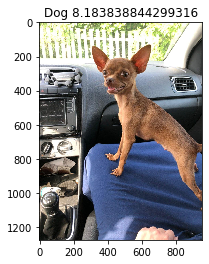

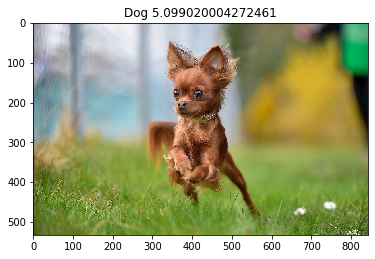

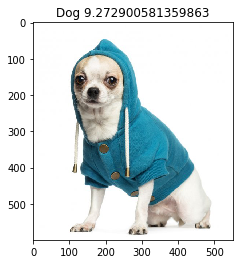

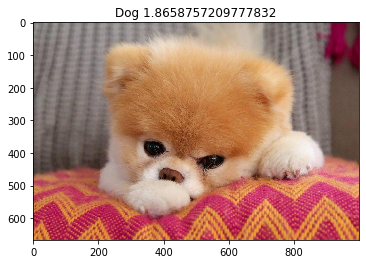

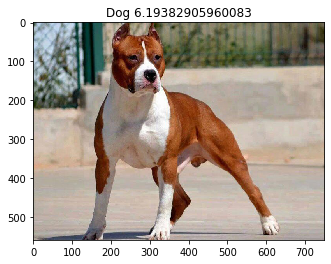

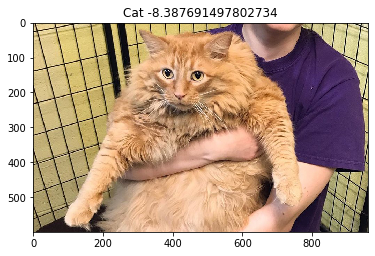

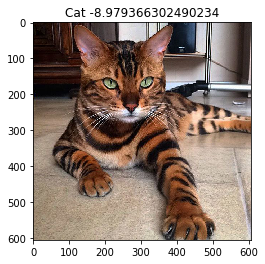

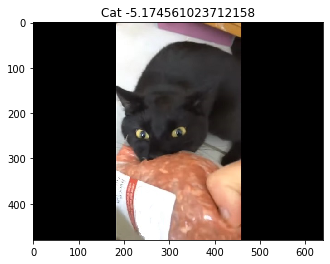

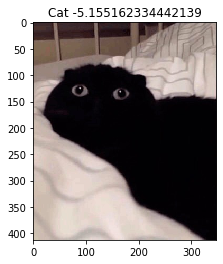

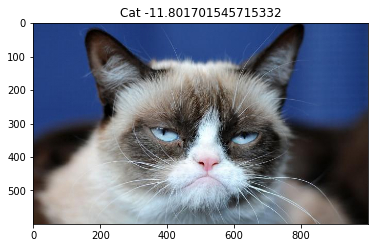

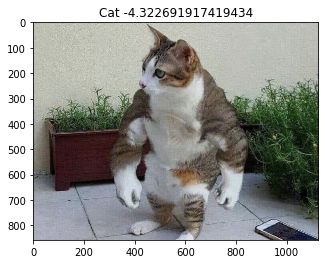

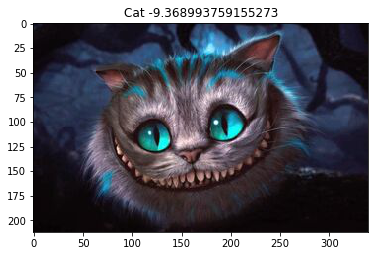

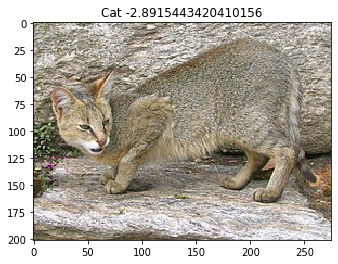

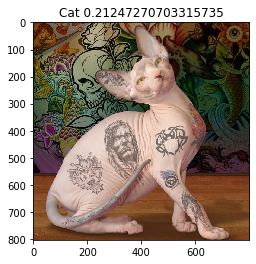

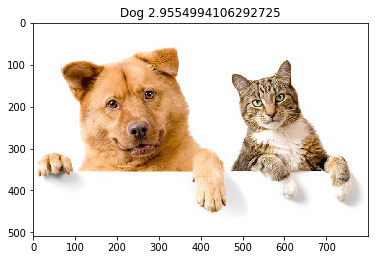

In [52]:
for i in range(15):
    image = Image.open(f'./data/{i}.jpg')
    img_array = img_to_array(image)
    img_resized, _ = resize_image(img_array, _)
    img_expended = np.expand_dims(img_resized, axis=0)
    prediction = model.predict(img_expended)[0][0]
    pred_label = 'Cat' if prediction < 0.5 else 'Dog'
    plt.figure()
    plt.imshow(image)
    plt.title(f'{pred_label} {prediction}')
